[0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10, 10, 10, 11, 11, 12, 12, 13, 14]


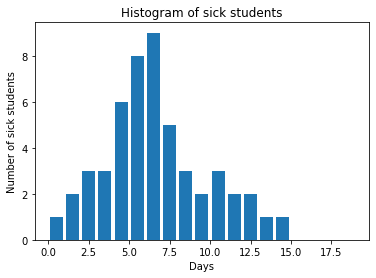

In [1]:
import simpy
import random
import numpy as np
from matplotlib import pyplot as plt

# Represents a single kid
class kid(object):
    
    '''
        env = environment
        infected = boolean if child is infected or not
        recovered = boolean if child is recovered or not
        name = string of child's name
        
    '''
    def __init__(self, env, infected=False, recovered=False, name="dummy"):
        self.env = env
        self.infected = infected
        self.recovered = recovered
        self.name = name
        self.days = []

    '''
        Infects healthy children, gets called if children get sick
        
        kids: list(kid)    List of all children
        Return: None
    '''
    def infect(self, kids):
        for k in kids:
            if (not k.infected):
                if (not k.recovered):
                    infected = random.randrange(0, 100)
                    if infected < 2:
                        k.infected = True

    '''
        Simulating children's day
        Will continuously loop through each day
        
        kids: list(kid)    List of all children
        Return: None
    '''
    def sim(self, kids):
        while True:
            if self.infected:
                for i in range(3):
                    self.days.append(self.infected)
                    yield self.env.timeout(1)
                    self.infect(kids)
                self.infected = False
                self.recovered = True
            else:
                self.days.append(self.infected)
                yield self.env.timeout(1)

# Sets up the environment
env = simpy.Environment()
random.seed(654321)

# Initialize children
kids = []
kids.append(kid(env, infected=True, name='Timmy'))
for i in range(20):
    kids.append(kid(env, name=str(i)))

# Begins each simulation iteration
for k in kids:
    env.process(k.sim(kids))

# How many times to run sim
env.run(until=20)


# Used to graph histogram
arr = np.zeros(20)
sickdays = []

# Loops through each day and calculates number of sick kids
for i in range(20):
    for k in kids:
        if k.days[i] == True:
            sickdays.append(i)
            arr[i] += 1

# Plot histogram
bins = list(range(20))

plt.hist(sickdays, bins, histtype='bar', rwidth=.8)
plt.xlabel('Days')
plt.ylabel('Number of sick students')
plt.title('Histogram of sick students')
 
# Show plot
plt.show()

With this seed, the pandemic will end in 15 days when the children are no longer infected.